## Reddit Post Natural Language Processing and Classification
![reddit](../images/reddit_logo.png)
### 04. Sentiment Analysis

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
posts_df = pd.read_csv('../data/clean_posts.csv')
#posts_df.head()

In the dataset of approximately 18,000 posts, around 190 posts contain the term **lone**<br>
This provides a guide for what we should expect to find as we perform the sentiment analysis.

In [3]:
posts_df[posts_df['all_text'].str.contains('lone', regex=False)].shape

(189, 8)

---
This notebook contains the results of NOT removing the term **alone** from the sklearn default English list of stop words.

In [4]:
culinary_df = posts_df[posts_df['class'] == 1].copy()
#culinary_df.head()

In [5]:
running_df = posts_df[posts_df['class'] == 0].copy()
running_df.reset_index(inplace=True)
#running_df.head()

### Examine the VADER Sentiment Library

In [6]:
vader_lexicon = pd.read_csv('../data/vader_lexicon.txt', sep='\t', header=0, names=['token', 'mean_sentiment_rating', 'standard_deviation', 'raw_human_sentiment_ratings'])
#vader_lexicon.iloc[4400:4415]

In [7]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

---
Loop through every Ask Culinary reddit post, and find the VADER sentiment scores for the contents of all_text (which is simply the title combined with the selftext

In [8]:
culinary_df['neg'] = [sent.polarity_scores(post)['neg'] for post in culinary_df['all_text']]
culinary_df['neu'] = [sent.polarity_scores(post)['neu'] for post in culinary_df['all_text']]
culinary_df['pos'] = [sent.polarity_scores(post)['pos'] for post in culinary_df['all_text']]
culinary_df['compound'] = [sent.polarity_scores(post)['compound'] for post in culinary_df['all_text']]
culinary_df.head(3)

,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
0,AskCulinary,"Hi everyone,\n\nI'm not sure if this is the pl...",Fridge for an instructional kitchen?,PrinceOfWales_,1610056955,2021-01-07 22:02:35,"Hi everyone, I'm not sure if this is the plac...",1,0.014,0.916,0.069,0.7663
1,AskCulinary,"Hey, I was wondering if anybody had tips to ke...",How to keep sourdough starter jar clean?,frowogger,1610055394,2021-01-07 21:36:34,"Hey, I was wondering if anybody had tips to ke...",1,0.044,0.829,0.127,0.9332
2,AskCulinary,\nI’m Gonna make birria tacos tomorrow and my ...,What substitutes can I use for guajillo chili’...,pelse_O_clock,1610055301,2021-01-07 21:35:01,I’m Gonna make birria tacos tomorrow and my g...,1,0.000,0.953,0.047,0.3612


---
Loop through every running reddit post, and find the VADER sentiment scores for the contents of all_text (which is simply the title combined with the selftext)

In [9]:
running_df['neg'] = [sent.polarity_scores(post)['neg'] for post in running_df['all_text']]
running_df['neu'] = [sent.polarity_scores(post)['neu'] for post in running_df['all_text']]
running_df['pos'] = [sent.polarity_scores(post)['pos'] for post in running_df['all_text']]
running_df['compound'] = [sent.polarity_scores(post)['compound'] for post in running_df['all_text']]
running_df.head(3)

,index,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
0,9766,running,"I""m just getting into running. TBQH a lot of t...",Do you try to beat your personal record everyt...,theRealLOCURO,1610054995,2021-01-07 21:29:55,"I""m just getting into running. TBQH a lot of t...",0,0.040,0.884,0.076,0.6134
1,9767,running,One day I hope to run a sub 3 marathon. I know...,Training advice?,lilteezybaby117,1610054062,2021-01-07 21:14:22,One day I hope to run a sub marathon. I know...,0,0.032,0.838,0.130,0.9696
2,9768,running,"Hi,\n\nI wear size 45 (EU Size) for my Convers...",What size should running shoes be?,Emil_1996,1610053837,2021-01-07 21:10:37,"Hi, I wear size (EU Size) for my Converse A...",0,0.037,0.771,0.192,0.9050


The Ask Culinary average compound sentiment score for it's posts was higher (40.37%) than the running posts, which had a compound sentiment score of 37.88%.
This implies on average the Ask Culinary posts were more positive.

The running posts actually did have more posts with a positive score, but the higher number of negative posts brought the total score lower than the Ask Culinary posts.

#### Create Word Vectorizer to analyze 16_000 posts and compare overall negativity (i.e. negative sentiment scores).

Use sklearn's default collection of English stop words as a starting point, but add a few terms that would not be useful.

Add stop words that might be measurements for recipes, and distance for running (km).

The terms **run** and **running** were very common, as one would expect, in the running posts, so add to the list of stop words.

From 02.EDA, the terms **like** and **just** were the two most popular terms, but do not add value, so also add to the list of stop words.

In [10]:
# hat tip to for adding custom stop words : https://stackoverflow.com/a/24386751/732396

# after sorting through a lot of highly negative words, the term 'fu' came up, so will add to the list of stop words.
more_stop_words = ['oz', 'cups', 'km', 'run', 'running', 'like','just','fu']
stop_words_list = text.ENGLISH_STOP_WORDS.union(more_stop_words)

This notebook demonstrates my first attempts with using the Sentiment Analyzer in hopes of trying to isolate posts that contained the words **alone**, **lone** etc.

Unbeknownst to me, the default sklearn stop words list contained the term **alone**, meaning it was excluding the very terms I was searching for.

In [11]:
culinary_neg_posts = culinary_df.sort_values(by='compound')[0:8000]
culinary_neg_posts.tail(3)

,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
5882,AskCulinary,im looking for a place that pays better and ha...,I work at a Midwestern USA gas station/pizza p...,geopjm10,1602041695,2020-10-07 03:34:55,im looking for a place that pays better and ha...,1,0.000,0.706,0.294,0.9062
2337,AskCulinary,I want to make some cakesicles for my kids fri...,What tempered chocolate is best to use to make...,lolalaughed,1607388315,2020-12-08 00:45:15,I want to make some cakesicles for my kids fri...,1,0.029,0.721,0.250,0.9062
5213,AskCulinary,"I’ve been making lot of pizza recently, but fr...",How to add ‘sourness’ to pizza?,lexpi,1603085866,2020-10-19 05:37:46,"I have been making lot of pizza recently, but ...",1,0.000,0.865,0.135,0.9062


In [12]:
lone_culinary_df = culinary_neg_posts[culinary_neg_posts['all_text'].str.contains('lone', regex=False)]
#lone_culinary_df.iloc[0]['all_text']

#### Create CountVectorizer

In [13]:
# use the default set of stop words (which includes 'alone')
count_vec_culinary_neg = CountVectorizer(stop_words = stop_words_list)
count_vec_culinary_neg.fit(culinary_neg_posts['all_text'])

cul_neg_posts_matrix = count_vec_culinary_neg.transform(culinary_neg_posts['all_text'])

# Code borrowed from lesson 5.04
# convert training data to dataframe
culinary_neg_words_df = pd.DataFrame(cul_neg_posts_matrix.todense(), columns = count_vec_culinary_neg.get_feature_names())

culinary_neg_words_df.head(3)

,aa,aahu,aaron,abdomen,abiding,ability,abit,able,abnb,abnormal,...,ひだまりクッキング,五香粉,北京烤鴨,半筋半肉,牛腩,牛腱子,花椒,草果,갈비찜,진간장
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print (f'There are {vader_lexicon.shape[0]} words in the VADER lexicon.' )
print (f'Try to find a match of the {culinary_neg_words_df.shape[1]} words found in the Ask Culinary posts.' )

There are 7519 words in the VADER lexicon.
Try to find a match of the 16269 words found in the Ask Culinary posts.


Per lesson 5.04, summing the count vector dataframe creates a Series of word counts.  Its index contains the words themselves:

In [15]:
#Started with the idea of just getting the most common 500 words, but instead just get all words in the reddit posts.

common_cul_neg_words = culinary_neg_words_df.sum().sort_values(ascending=False)
common_cul_neg_words.index

Index(['make', 'use', 'recipe', 'chicken', 'does', 'time', 'cooking', 'know',
       'making', 'cook',
       ...
       'margarhita', 'marcato', 'mantecare', 'maraville', 'marathon',
       'maraschino', 'manwich', 'manufactures', 'manufactors', 'aa'],
      dtype='object', length=16269)

For each word in the subreddit posts, try to see if a sentiment value exists. If not a word is considered neutral.

In [16]:
found_cul_neg_words = pd.DataFrame([ word for word in list(common_cul_neg_words.index) if word in list(vader_lexicon['token'])] , columns =['word']) 
print (f'Found {found_cul_neg_words.shape[0]} Ask Culinary words in the VADER lexicon.')
found_cul_neg_words.head()

Found 1509 Ask Culinary words in the VADER lexicon.


,word
0,want
1,good
2,help
3,thanks
4,sure


If a word is found in the VADER lexicon, add its average rating (-4 for most negative, +4 for most positive)

In [17]:
found_cul_neg_words['rating'] = [vader_lexicon[vader_lexicon['token'] == word]['mean_sentiment_rating'].values[0] for word in found_cul_neg_words['word']]

# Sorting the words by most negative words in the lexicon displays some truly horrible words, so will not print out here.
#found_cul_neg_words.sort_values(by='rating', inplace=True, ignore_index=True)

found_cul_neg_words.head()

,word,rating
0,want,0.3
1,good,1.9
2,help,1.7
3,thanks,1.9
4,sure,1.3


In [18]:
lonely_cul_words = found_cul_neg_words[found_cul_neg_words['word'].str.contains('lone', regex=False)].copy()
lonely_cul_words['count'] = [common_cul_neg_words [word] for word in lonely_cul_words['word']]
lonely_cul_words.set_index('word', inplace=True)
lonely_cul_words

,rating,count
word,,
lonely,-1.5,2


The word **alone** was found in the Ask Culinary subreddit posts 40 times.  The word **lonely** was found two times.

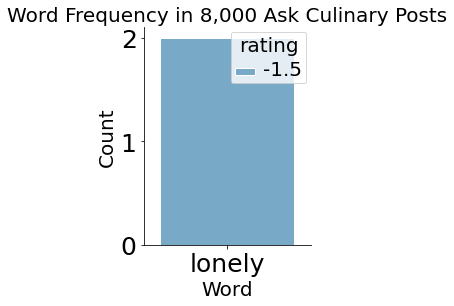

In [19]:
plt.figure(figsize=(3,4))

ax = sns.barplot(y ='count', hue = 'rating', x = lonely_cul_words.index, data = lonely_cul_words,
            palette = 'Blues', edgecolor = 'w', dodge=False)

ax.set_title("Word Frequency in 8,000 Ask Culinary Posts",fontsize=20)
ax.set_xlabel("Word",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=25)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')

# ax.text(0,30, '40', ha='center', fontsize=20, color='white')
# ax.text(1,7, '2', ha='center', fontsize=20, color='gray')

sns.despine()

plt.show()

Repeat all steps to find negative words in most negative running posts

In [20]:
running_df.shape

(8081, 13)

In [21]:
# First idea was just take the most 300 posts, but later decided to go with 8_000 for each
running_neg_posts = running_df.sort_values(by='compound')[0:8000]
running_neg_posts.tail(3)

,index,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
2024,11790,running,I've been running since August. Smaller distan...,Impromptu Half Marathon (my 1st),pako1337,1607930409,2020-12-14 07:20:09,I have been running since August. Smaller dist...,0,0.058,0.736,0.206,0.9965
7612,17378,running,"Good morning runners,\n\nToday I set out for a...",Alternate ways to check your progress (not che...,Musef,1601901059,2020-10-05 12:30:59,"Good morning runners, Today I set out for a ...",0,0.005,0.754,0.241,0.9965
4605,14371,running,Lots of posts be like .. i ran 2 miles without...,"Runners need to stop saying they're ""bad"" at r...",miii13,1605050194,2020-11-10 23:16:34,Lots of posts be like .. i ran miles without...,0,0.022,0.699,0.279,0.9965


#### Create CountVectorizer

In [22]:
# Use sklearn's default stop words, which still contains *alone*
count_vec_running_neg = CountVectorizer(stop_words = stop_words_list)

count_vec_running_neg.fit(running_neg_posts['all_text'])

run_neg_posts_matrix = count_vec_running_neg.transform(running_neg_posts['all_text'])

running_neg_words_df = pd.DataFrame(run_neg_posts_matrix.todense(), columns = count_vec_running_neg.get_feature_names())

running_neg_words_df.head(3)

,aa,aaand,ab,ababel,aback,abandon,abandoned,abandoning,abb,abc,...,zoomx,zr,zwift,zyrtec,élévation,œil,και,καλημέρα,καλό,μήνα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Per lesson 5.04, summing the count vector dataframe creates a Series of word counts.  Its index contains the words themselves:

In [23]:
#Started with the idea of just getting the most common 500 words, but instead just get all words in the reddit posts.

common_run_neg_words = running_neg_words_df.sum().sort_values(ascending=False)
common_run_neg_words.index

Index(['time', 'week', 'miles', 'training', 'really', 'mile', 'started',
       'runs', 'marathon', 'day',
       ...
       'fussy', 'fusterated', 'futbol', 'futility', 'roadhawk', 'roadblock',
       'fuvking', 'fz', 'gabe', 'μήνα'],
      dtype='object', length=17962)

For each word in the subreddit posts, try to see if a sentiment value exists. If not a word is considered neutral.

In [24]:
found_run_neg_words = pd.DataFrame([ word for word in list(common_run_neg_words.index) if word in list(vader_lexicon['token'])] , columns =['word']) 
print (f'Found {found_run_neg_words.shape[0]} running words in the VADER lexicon.')
found_run_neg_words.head()

Found 2095 running words in the VADER lexicon.


,word
0,pain
1,good
2,want
3,help
4,thanks


If a word is found in the VADER lexicon, add its average rating (-4 for most negative, +4 for most positive)

In [25]:
found_run_neg_words['rating'] = [vader_lexicon[vader_lexicon['token'] == word]['mean_sentiment_rating'].values[0] for word in found_run_neg_words['word']]

# Sorting the words by most negative words in the lexicon displays some truly horrible words, so will not print out here.
#found_run_neg_words.sort_values(by='rating', inplace=True, ignore_index=True)

found_run_neg_words.head()

,word,rating
0,pain,-2.3
1,good,1.9
2,want,0.3
3,help,1.7
4,thanks,1.9


In [26]:
lonely_run_words = found_run_neg_words[found_run_neg_words['word'].str.contains('lone', regex=False)].copy()
lonely_run_words['count'] = [common_run_neg_words [word] for word in lonely_run_words['word']]
lonely_run_words.set_index('word', inplace=True)
lonely_run_words.head()

,rating,count
word,,
lonely,-1.5,8
lone,-1.1,7
lonelier,-1.4,1
loneliness,-1.8,1


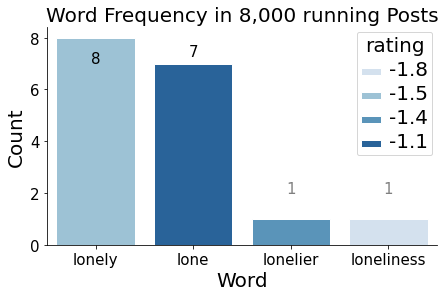

In [27]:
plt.figure(figsize=(7,4))

ax = sns.barplot(y ='count', hue = 'rating', x = lonely_run_words.index, data = lonely_run_words,
            palette = 'Blues', edgecolor = 'w', dodge=False)

ax.set_title("Word Frequency in 8,000 running Posts",fontsize=20)
ax.set_xlabel("Word",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')

#ax.text(0,110, '125', ha='center', fontsize=15, color='white')
ax.text(0,7, '8', ha='center', fontsize=15, color='black')
ax.text(1,7.3, '7', ha='center', fontsize=15, color='black')
ax.text(2,2, '1', ha='center', fontsize=15, color='gray')
ax.text(3,2, '1', ha='center', fontsize=15, color='gray')

sns.despine()

plt.show()




After going through my process of collecting all the aggregated sentiment scores and search results, I took me a chunk of time to figure out why the term **alone** was missing from my results.

This was due to the fact that the VADER default stop words file contained the exact term I was searching for.

**Lesson learned:** Inspect the stop words file carefully, as well as other tools or libraries one might be using.